In [25]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql

import sys
import os

# Add the 'utils' folder to the module search path
utils_path = os.path.abspath(os.path.join('utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils import myutils

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [2]:
# Define schema
schema = {
    'id_claim_hash': 'str',
    'claim_type': 'str',
    'claim_status': 'str',
    'claim_status_des': 'str',
    'work_hours': 'float64',
    'vin_hash': 'str',
    'product_division': 'str',
    'business_unit_des': 'str',
    'region': 'str',
    'country': 'str',
    'id_failure': 'str',
    'component': 'str',
    'component_des': 'str',
    'item_type': 'str',
    'id_causal_part_hash': 'str',
    'id_part_number_hash': 'str',
    'part_number_des': 'str',
    'cd_decision': 'str',
    'decision_des': 'str',
    'amount': 'float64',
    'cd_dealer_hash': 'str'
}


file_path = '../dati/processed/filtered_data.csv'

# Read the CSV file with the defined schema
df = pd.read_csv(file_path, dtype=schema)

df.head(3)

,id_claim_hash,claim_type,claim_status,claim_status_des,work_hours,failure_date,vin_hash,product_division,business_unit_des,region,country,id_failure,component,component_des,item_type,id_causal_part_hash,id_part_number_hash,part_number_des,cd_decision,decision_des,amount,cd_dealer_hash
0,c2d120b2b92069f2162a59eb0d3a80265278da6abd29a6b29e773d82e3cbb4a3,ZW02,Z011,Dual claim,NaN,2021-02-19,33f1bbdd2a721342cdf4dd445d1c7f83d6eaf6a70220998c2bf49f7c3b952c6e,TRUCK,COMMERCIAL VEHICLES B.U.,Europe,Germany,0005507640075,55076,LOCKS,FR,86c4eebc823eb1e1b8276f4860078cdb8131df52c4c5a67ff11aa4873b9e503c,3fbed647e4ecc7e2d23689bcca2570232cf42ec821cad4285966b58c0436cdfd,-E1,P,Pay,0.0,0a2079ba8f1a4910f976035229e2a8b179b3ed5114d5cc037350738414b9ae3c
1,e6b7ba80f1c81d065a93ee4b8731160f5fe2c814c12dce6897fa4868b192c08d,ZW01,Z085,Claim rejected,0.5,2021-04-19,9f5f059b2b17ad5e330b6b8fe42cf686357c9f82ca6c9f56f5bd1a5ac33f8713,TRUCK,BU TRUCKS -HEAVY RANGE,Europe,France,0005073860081,50738,LNG PRESSURE REDUCER,FR,d9685d4413284a71e1ca4aba08468968657c4f3645236bf521deacaa2d1fae05,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,N,Do not pay,37.0,67f0f7f1c4c0e46eab5ec67d23b43ef687b1043932faffb1dfdf5c79e727e65f
2,be895c57c041a7e50e2ad79866f1b112e694e13ed7ab9b65569f2d8bf2da3b16,ZW02,Z080,Claim paid,1.0,2020-05-15,0be8d2e3e2cf3ed084770f7bdf7154e14f15d22e82150abab5ff8e3d1001ef4e,TRUCK,BU TRUCKS -HEAVY RANGE,Europe,France,0005075810721,50758,FUEL PUMP,FR,7e9c47d47a74be3a797838eda09f6c083f92e950b96d348849a7b5bc97c11409,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,92.0,f167ef13472ae9fb00040c777105c255f64990cd14e3501572264e17da58cf58


In [3]:
print("# occurrences Dataset: {}".format(df.shape[0]))

# occurrences Dataset: 507760


In [4]:
df.describe()

,work_hours,amount
count,502554.000000,507760.000000
mean,1.612991,102.324976
std,3.135843,236.556416
min,0.000000,0.000000
25%,0.500000,25.560000
50%,1.000000,50.400000
75%,2.000000,109.000000
max,298.000000,41052.278820


Check if there are any null values and identify the columns that contain them

In [5]:
myutils.missing_data_count(df)

                     Total   Percent
work_hours            5206  0.010253
decision_des           307  0.000605
component_des           39  0.000077
business_unit_des        7  0.000014
claim_status_des         1  0.000002
id_claim_hash            0  0.000000
amount                   0  0.000000
cd_decision              0  0.000000
part_number_des          0  0.000000
id_part_number_hash      0  0.000000
id_causal_part_hash      0  0.000000
item_type                0  0.000000
id_failure               0  0.000000
component                0  0.000000
claim_type               0  0.000000
country                  0  0.000000
region                   0  0.000000
product_division         0  0.000000
vin_hash                 0  0.000000
failure_date             0  0.000000
claim_status             0  0.000000
cd_dealer_hash           0  0.000000


#### Categorical Variable

In [6]:
myutils.object_distinct_value_no_value_pandas(df)

# Dataset rows: 507760
Column id_claim_hash has 415934 distinct value(s)


Column claim_type has 3 distinct value(s)


Column claim_status has 28 distinct value(s)


Column claim_status_des has 27 distinct value(s)


Column failure_date has 1096 distinct value(s)


Column vin_hash has 162446 distinct value(s)


Column product_division has 2 distinct value(s)


Column business_unit_des has 5 distinct value(s)


Column region has 1 distinct value(s)


Column country has 35 distinct value(s)


Column id_failure has 65131 distinct value(s)


Column component has 950 distinct value(s)


Column component_des has 2961 distinct value(s)


Column item_type has 3 distinct value(s)


Column id_causal_part_hash has 29545 distinct value(s)


Column id_part_number_hash has 4 distinct value(s)


Column part_number_des has 4 distinct value(s)


Column cd_decision has 6 distinct value(s)


Column decision_des has 5 distinct value(s)


Column cd_dealer_hash has 1823 distinct value(s)




In [7]:
myutils.object_distinct_value(df)

Column id_claim_hash has 415934 distinct value(s)


id_claim_hash
3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744    33
dead25c1c09316e747cb306b9ad50d7500f26d05ac7d0484464770991bb49e27    30
fc06eb4f09c0def5bef6b65ae9c8f73cb113b49ed049ddaaa06d460e1bd9ba8c    30
1593a9e49d1c118c1dc67e5e38ded5bd1aaefef84ec3d9bdbbe2072cd1132125    30
ff1a988774f1e93e12b9a9f94573e7f83f8981e76231a84706ab90d337b339e2    30
Name: count, dtype: int64



Column claim_type has 3 distinct value(s)


claim_type
ZW02    350724
ZW01    149326
ZW06      7710
Name: count, dtype: int64



Column claim_status has 28 distinct value(s)


claim_status
Z080    481662
Z085     17921
Z005      4514
Z011      2614
Z012       263
Name: count, dtype: int64



Column claim_status_des has 27 distinct value(s)


claim_status_des
Claim paid                               481662
Claim rejected                            17921
Claim cancelled/replaced                   4514
Dual claim                                 2614
Claim in error policy (to be amended)       263
Name: count, dtype: int64



Column failure_date has 1096 distinct value(s)


failure_date
2021-01-04    1145
2021-02-15    1144
2021-01-18    1137
2021-01-11    1129
2021-12-20    1090
Name: count, dtype: int64



Column vin_hash has 162446 distinct value(s)


vin_hash
41290f0cc62805a35dc1466a384d3dc27f217d6adbd0f7442a932119e5aaa2d1    178
76fed0f3cd157e637411750eb8a1f0bb6abfe99ff8a8552480e87b1a2cf00704    161
77db4d28e184da31a907b51509d5ede5efa427dc797d5b6b28338537aff4e96f    155
ad5ccec4f6ade2e0e02f6ad0646bd0e58be2648d4bc4d41687f37f52ac179102    146
91ff0c57e928c4c4164ef33c7c2ccc92b3503bf6bd23fdf5331348c9c3d77006    143
Name: count, dtype: int64



Column product_division has 2 distinct value(s)


product_division
TRUCK    366234
BUS      141526
Name: count, dtype: int64



Column business_unit_des has 5 distinct value(s)


business_unit_des
COMMERCIAL VEHICLES B.U.    174906
BU TRUCKS -HEAVY RANGE      165997
BUS DIVISION                135391
BU TRUCKS -MEDIUM RANGE      30984
OTHERS                         475
Name: count, dtype: int64



Column region has 1 distinct value(s)


region
Europe    507760
Name: count, dtype: int64



Column country has 35 distinct value(s)


country
Italy             113349
France            104695
Germany            90862
United Kingdom     41540
Poland             37717
Name: count, dtype: int64



Column id_failure has 65131 distinct value(s)


id_failure
0002970000961    7110
0002930500900    5453
0007691120561    3568
0002930240900    3511
0007691120571    3468
Name: count, dtype: int64



Column component has 950 distinct value(s)


component
76911    23746
50713    16553
50743    14182
29700     8349
54241     8179
Name: count, dtype: int64



Column component_des has 2961 distinct value(s)


component_des
CHASSIS LOOM    11290
HOSES            8332
ANS 24 HOURS     7914
CAB LOOM         7644
BATTERY          7341
Name: count, dtype: int64



Column item_type has 3 distinct value(s)


item_type
FR      504849
SUBL      2381
MAT        530
Name: count, dtype: int64



Column id_causal_part_hash has 29545 distinct value(s)


id_causal_part_hash
db81f3bebd45eb0436f1f4793d90d12dd4d5279f745268d2084d24f862b0cc96    29853
b7b2708b6f8b48f6e518040c870d6bef825bcb31a8b5272104d90df86dd2af9a     3115
55bf64589bcb6b2d713d67b0ce3eec364d65b56325c811eddcc95ec161236a03     2289
8a6ce6993469b0044dbd525a5b6656aa626cea4902b867570069273d16a4d6be     2224
be489a7ed23065e5f5341c367f7923c5b5d41caa90ca82a8548b27ed7b6da6b9     2214
Name: count, dtype: int64



Column id_part_number_hash has 4 distinct value(s)


id_part_number_hash
5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60    431680
3fbed647e4ecc7e2d23689bcca2570232cf42ec821cad4285966b58c0436cdfd     54246
e25ab47cfc9b206e56e5d4e4ab6f920c3a0499c4d3e29b3a8043cd8340b84fd5     18166
0d61e4ef572158cea35a03878c37f91c688ccfd4ad1ae1eed58aaed8da8a6c06      3668
Name: count, dtype: int64



Column part_number_des has 4 distinct value(s)


part_number_des
-ECONOMY      431680
-E1            54246
-ECONOMY50     18166
-E3             3668
Name: count, dtype: int64



Column cd_decision has 6 distinct value(s)


cd_decision
P    460901
N     24676
D     16273
V      5602
#       307
S         1
Name: count, dtype: int64



Column decision_des has 5 distinct value(s)


decision_des
Pay                                                               460901
Do not pay                                                         24676
Repeated fault                                                     16273
Difference between creation and workshop date out exceed limit      5602
Spare part wty to be checked                                           1
Name: count, dtype: int64



Column cd_dealer_hash has 1823 distinct value(s)


cd_dealer_hash
90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631    17874
3c333b60540d8740d7abaf229d161f9384ab04b2522cd75a5dff5c69643e5de6    10863
b685b1b34c2fcc8421cedff4f9f629fae402617eba302b9ce5744cdfb740bd89     6130
b69c62ae4c26f33083a9740acfd60a6c33756d26d0f5dc20e5560b48429f2e4d     5692
e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8     4371
Name: count, dtype: int64

#### Numerical Variables

In [8]:
# Descriptive statistics for all numeric columns
stats = df.describe()
print(stats)

          work_hours         amount
count  502554.000000  507760.000000
mean        1.612991     102.324976
std         3.135843     236.556416
min         0.000000       0.000000
25%         0.500000      25.560000
50%         1.000000      50.400000
75%         2.000000     109.000000
max       298.000000   41052.278820


The mean values and percentiles of the numeric variables are relatively low compared to the maximum values. This implies that some values deviate significantly, as highlighted by the following Box Plots:

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


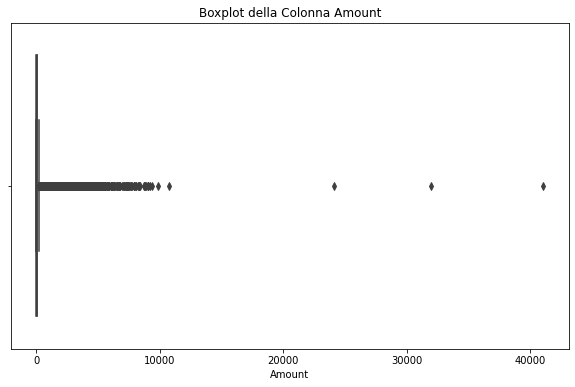

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Boxplot della Colonna Amount')
plt.xlabel('Amount')
plt.show()

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


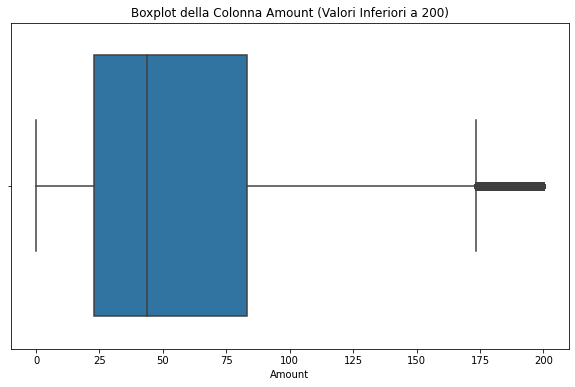

In [10]:
# Filter the data to include only values less than 200
filtered_df = df[df['amount'] < 200]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['amount'])
plt.title('Boxplot della Colonna Amount (Valori Inferiori a 200)')
plt.xlabel('Amount')
plt.show()

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


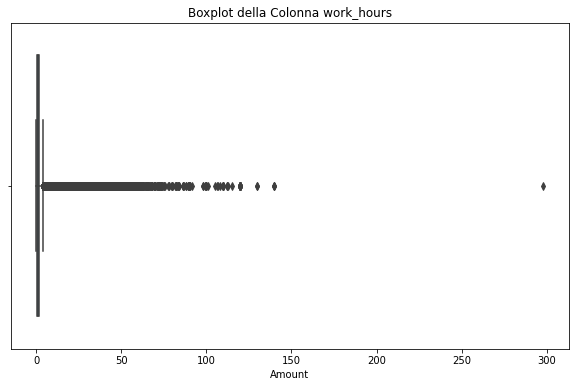

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['work_hours'])
plt.title('Boxplot della Colonna work_hours')
plt.xlabel('Amount')
plt.show()

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


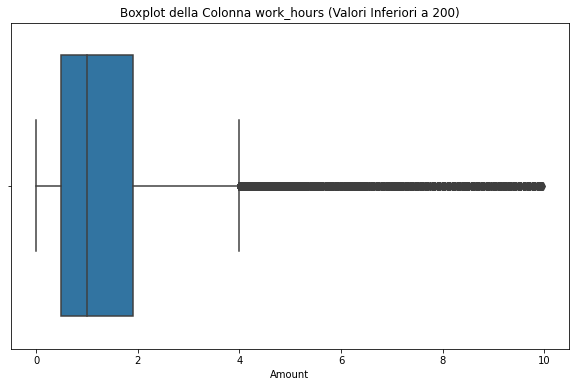

In [12]:
# Filter the data to include only values less than 10
filtered_df = df[df['work_hours'] < 10]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['work_hours'])
plt.title('Boxplot della Colonna work_hours (Valori Inferiori a 200)')
plt.xlabel('Amount')
plt.show()

#### CLAIM Analysis

Our case study is to analyze which claim represents an anomaly. The dataset contains multiple occurrences for the same claim, so we need to find a representation where the ID_CLAIM_HASH is unique and as representative as possible of the information contained in the original dataset

Does the ID_CLAIM_HASH have multiple dealers associated with it?

In [13]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","cd_dealer_hash")

Each id_claim_hash has only one value of cd_dealer_hash.


In [14]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","claim_type")

Each id_claim_hash has only one value of claim_type.


In [15]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","claim_status")

Each id_claim_hash has only one value of claim_status.


In [16]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","failure_date")

Each id_claim_hash has only one value of failure_date.


In [17]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","vin_hash")

Each id_claim_hash has only one value of vin_hash.


In [18]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","product_division")

Each id_claim_hash has only one value of product_division.


In [19]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","item_type")

There are id_claim_hash with more than one value of item_type:


,id_claim_hash,item_type
1924,013884f30faa8e9a05ca130ce4605d252925423600b50e6f21a2fd492fc01da4,2
2066,015034e06887095f81a1d069f0b99b9406c567b083d3a954fa53176207d56c29,2
5495,0375f5082cce7990788668be795238673a4265ad6628fd31dea071968981bdb1,2
6378,040058b7a3849baa52969c3aa3a344ad1e762c2c509e5ceb2b4fddcb6d13d2cd,2
8115,050c6d326695206fd3d7efc0cceb794f54b5ed8a8d59f30bc7d4ba0d2327b531,2


In [20]:
myutils.checkMultipleValueForKey(df,"id_claim_hash","cd_decision")

There are id_claim_hash with more than one value of cd_decision:


,id_claim_hash,cd_decision
23,00046563d03374eeebfc5894b506525cb51b8ec60aa03cb99a03e05a8d80aaf0,2
157,00174042fe906be0a20b2300d49dc298788af3e7cbb0b86de4832d7a10887174,2
245,0026df5f93c5df8917a3ef65d7d7fd35f1050a96629d79cb27c687d577c23b42,2
274,002b4a581b337cdeb42034c15df6a3b80af084416540f7745bd810a3b0894ebb,2
289,002d9dd97ca730ba1783c564eade938888c5fa7cdb026d254028b56dcccfb3ff,2


Check the Key

In [21]:
distinct_counts_claim = df.drop_duplicates(subset=['id_claim_hash'])

distinct_counts = df.drop_duplicates(subset=['id_claim_hash', 'cd_dealer_hash', 'claim_type', 'claim_status', 'failure_date', 'vin_hash', 'product_division'])

print("Number of distinct rows for id_claim_hash:", distinct_counts_claim.shape[0])
print("Number of distinct rows:", distinct_counts.shape[0])

if distinct_counts_claim.shape[0] == distinct_counts.shape[0]:
    print("The number of occurrences for id_claim_hash is equal to the number of occurrences for the combination of id_claim_hash and the other columns.")
else:
    print("The list of columns is not a key")


Number of distinct rows for id_claim_hash: 415934
Number of distinct rows: 415934
The number of occurrences for id_claim_hash is equal to the number of occurrences for the combination of id_claim_hash and the other columns.


<b/>The Key is : [id_claim_hash, cd_dealer_hash, claim_type, claim_status, failure_date, vin_hash, product_division]</b>

Let's take the ID_CLAIM_HASH that has the most occurrences:

In [22]:
df[df['id_claim_hash'] == '3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744']

,id_claim_hash,claim_type,claim_status,claim_status_des,work_hours,failure_date,vin_hash,product_division,business_unit_des,region,country,id_failure,component,component_des,item_type,id_causal_part_hash,id_part_number_hash,part_number_des,cd_decision,decision_des,amount,cd_dealer_hash
29449,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,1.5,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005556100411,55561,SIGN BOX ASSEMBLY,FR,2b8921e77843e76a7b4d1c125c74c17e906515c92518109e990b92df6c924230,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,57.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
42442,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,1.0,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005550400401,55504,CENTRAL SEAT,FR,24789aa861272667e1f0b8b69997b580bbba912ed1fdedfe6407296b7f8eb3d8,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,38.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
51695,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,6.0,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005509100011,55091,OUTSWINGING DOOR,FR,ae744e80c6e382ee8bc7a47a2b04ea6d32904c4398cdbfee8a2952bb6bc9330d,e25ab47cfc9b206e56e5d4e4ab6f920c3a0499c4d3e29b3a8043cd8340b84fd5,-ECONOMY50,P,Pay,228.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
56675,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,4.0,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005502100421,55021,FLOOR,FR,db81f3bebd45eb0436f1f4793d90d12dd4d5279f745268d2084d24f862b0cc96,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,152.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
75695,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,3.5,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005060130031,50601,RADIATOR SUPPORTS,FR,d355b577638f202d54f755fabcca25ad03e2d7278587a802e84fd41abe97e8a2,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,133.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
76402,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,2.0,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005536250031,55362,CONNECTION UNIT FLAP,FR,fd5c73f9b792b9da1721974b780579f06c6f5392ded05ab5ca6c263be1fb3335,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,76.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
89361,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,3.0,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005522100411,55221,TRIMS,FR,2f0e76830fcdd8eb935a9dc6ec9b26fb30cd7790a663426593831e956af476bd,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,114.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
96583,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW02,Z080,Claim paid,1.5,2021-12-20,cc759940c13a71d0dd6dadadec9bdff7bb49080ac5935e5aad6675ff35c8f705,BUS,BUS DIVISION,Europe,Italy,0005522150401,55221,CAB HEADLINING,FR,9401e74eb17fc660df288e417dbd870d8d433fc399bd6a25df1d0065142af07f,5cc870b50d68a02f026216d8d089eb8615e8e26129308df13a8f98b99706cd60,-ECONOMY,P,Pay,57.0,086eac609c99ce19ae279a254df5d85594b1b93b18c16f2c873f259774856866
98642,3857006841c8cf17af097bf71f912d8a8c87b4ca2d97660390159816b1137744,ZW

It is evident that a claim has multiple processing instances at the same dealer. Therefore, it is necessary to achieve normalization that provides a summarized view (single row) to define the overall processing performed

In [23]:
df.groupby(
    ['cd_decision','decision_des']
).size().reset_index(name='count')

,cd_decision,decision_des,count
0,D,Repeated fault,16273
1,N,Do not pay,24676
2,P,Pay,460901
3,S,Spare part wty to be checked,1
4,V,Difference between creation and workshop date out exceed limit,5602


In [24]:
df.groupby(
    ['claim_status','claim_status_des']
).size().reset_index(name='count')

,claim_status,claim_status_des,count
0,Z001,Draft,98
1,Z002,Claim submitted,63
2,Z005,Claim cancelled/replaced,4514
3,Z010,Claim in error (to be amended),50
4,Z011,Dual claim,2614
5,Z012,Claim in error policy (to be amended),263
6,Z013,Claim in error policy (to be cancelled),52
7,Z014,Awaiting additional dealer info,109
8,Z015,Claim rejected (to be resubmitted),3
9,Z021,Error in determ. prices/accounts,4
